In [190]:
import pandas as pd

In [191]:
#stats_fhe = pd.read_csv('./stats_FHEDecisionTreeClassifier.csv')
#stats = pd.read_csv('./stats_DecisionTreeClassifier.csv')
stats_fhe = pd.read_csv('./stats_FHERandomForestClassifier.csv')
stats = pd.read_csv('./stats_RandomForestClassifier.csv')
stats.drop_duplicates(subset=["max_depth", "n_features", "n_bits"], inplace=True)

In [192]:
stats_fhe

,Unnamed: 0,model,max_depth,n_bits,n_features,training_time,compilation_time,prediction_time,accuracy,f1
0,0,FHERandomForestClassifier,3,2,5,0.075663,0.529445,92.475718,0.672,0.528736
1,1,FHERandomForestClassifier,3,2,6,0.062045,0.512101,79.052968,0.724,0.601156
2,2,FHERandomForestClassifier,3,2,7,0.062612,0.497909,84.115084,0.672,0.528736
3,3,FHERandomForestClassifier,3,2,8,0.062276,0.485225,173.116945,0.732,0.612717
4,4,FHERandomForestClassifier,3,2,9,0.089601,1.034632,129.684711,0.712,0.581395
...,...,...,...,...,...,...,...,...,...,...
326,326,FHERandomForestClassifier,4,10,16,0.091030,0.824419,1187.096598,0.900,0.898785
327,327,FHERandomForestClassifier,4,10,17,0.115521,0.857859,1163.069719,0.904,0.903226
328,328,FHERandomForestClassifier,4,10,18,0.097607,0.839146,1103.097520,0.880,0.875000
329,329,FHERandomForestClassifier,4,10,19,0.142258,0.888238,1102.784318,0.908,0.911197


In [193]:
stats_fhe['pred_time_instance'] = stats_fhe['prediction_time'] / 250 

In [194]:
stats_fhe.max_depth.describe()

count    331.000000
mean       3.410876
std        0.492738
min        3.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: max_depth, dtype: float64

In [195]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

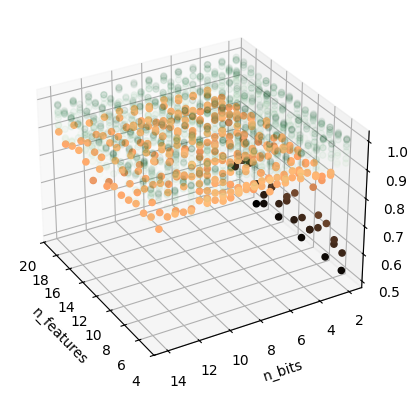

In [196]:
from matplotlib.ticker import MaxNLocator
fig = plt.figure()
ax = plt.axes(projection='3d')
X = stats_fhe['n_features']
Y = stats_fhe['n_bits']
Z = stats_fhe['f1']
ax.set_xlabel('n_features')
ax.scatter3D(X, Y, Z, c=Z, cmap='copper', alpha=1.0)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
sample = stats.sample(frac=0.5)
X = sample['n_features']
Y = sample['n_bits']
Z = sample['f1']
ax.set_ylabel('n_bits')
ax.set_zlabel('F1');
ax.view_init(30, 150)
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens', alpha=0.05)

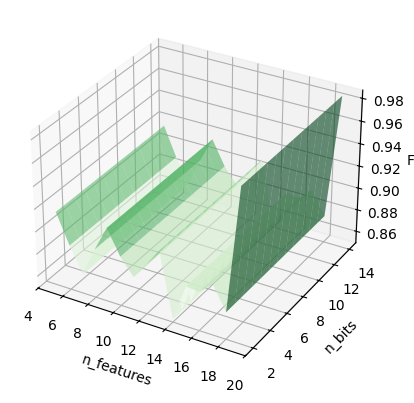

In [197]:
from matplotlib.ticker import MaxNLocator
import numpy as np
fig = plt.figure()
ax = plt.axes(projection='3d')
X = stats['n_features']
Y = stats['n_bits']
Z = stats['f1']
# Create a grid for the surface plot
X_grid, Y_grid = np.meshgrid(np.unique(X), np.unique(Y))
Z_grid = np.array([np.interp(X_grid[i], X, Z) for i in range(len(Y_grid))])

# Plot the surface
ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='Greens', alpha=0.6)

# Scatter plot
#ax.scatter3D(X, Y, Z, c=Z, cmap='Greens', alpha=0.5)
ax.set_xlabel('n_features')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_ylabel('n_bits')
ax.set_zlabel('F1');

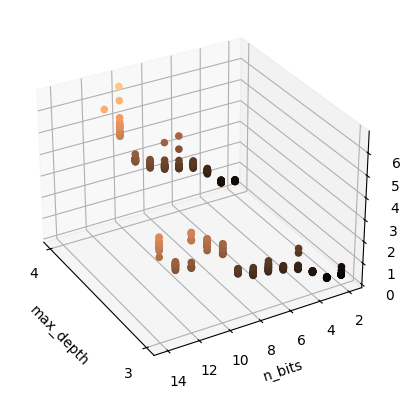

In [198]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = stats_fhe['max_depth']
Y = stats_fhe['n_bits']
Z = stats_fhe['pred_time_instance']
ax.set_xlabel('max_depth')
ax.scatter3D(X, Y, Z, c=Z, cmap='copper', alpha=1.0)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
sample = stats.sample(frac=0.5)
X = sample['n_features']
Y = sample['n_bits']
Z = sample['prediction_time']
ax.set_ylabel('n_bits')
ax.set_zlabel('F1');
ax.view_init(30, 150)
#ax.scatter3D(X, Y, Z, c=Z, cmap='Greens', alpha=0.05)